## ECE 219 Project 2

### Part 1 Task 1

In [2]:
#read dataset main.csv
%pip install -q gdown
import gdown
import pandas as pd

file_id = "1peRSVgEbhGvLQZIsnQq93IW9_nwmqlOT"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, "main.csv", quiet=False)


df = pd.read_csv("main.csv")

Downloading...
From: https://drive.google.com/uc?id=1peRSVgEbhGvLQZIsnQq93IW9_nwmqlOT
To: /content/main.csv
100%|██████████| 40.5M/40.5M [00:00<00:00, 105MB/s] 


#### Task 1.1 Defining Pseudo Labels

In [3]:
reviews = df["review_text"]
lengths = reviews.apply(lambda x: len(x.split()))

# Create mask to select the short and long reviews
short_mask = lengths <= lengths.quantile(0.25)
long_mask = lengths >= lengths.quantile(0.75)

df_short = df[short_mask]
df_long = df[long_mask]

df_short["length_label"] = 0   # Short
df_long["length_label"]  = 1   # Long

df_filtered = pd.concat([df_short, df_long], axis=0)
display(df_filtered)

num_retained = len(df_short) + len(df_long)
print(f"Retained Long and Short after filtering: {num_retained}; Discarded: {len(df) - num_retained}")

avg_len_short = lengths[short_mask].mean()
avg_len_long = lengths[long_mask].mean()
overall_avg = lengths[short_mask | long_mask].mean()
print(f"Avg short length: {avg_len_short}; Avg long length: {avg_len_long}; Avg overall length: {overall_avg}")

/tmp/ipython-input-1705718629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["length_label"] = 0   # Short
/tmp/ipython-input-1705718629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long["length_label"]  = 1   # Long


,user,playtime,post_date,helpfulness,review_text,recommend,early_access_review,appid,game_name,release_date,genres,length_label
0,Pakistan warrior,47.8,"November 3, 2023",3911,ALT + F4 best feature in the game 10/10,True,NaN,1938090,Call of Duty®,"Oct 27, 2022",Action,0
1,Zuvi,1969.8,"November 2, 2022",3154,"SPAWN DIE, SPAWN DIE, SPAWN DIE, SPAWN DIE.-Jev",True,NaN,1938090,Call of Duty®,"Oct 27, 2022",Action,0
3,Lunación,482.2,"November 10, 2023",2530,"Nobody will read my review, so I'll just say I...",True,NaN,1938090,Call of Duty®,"Oct 27, 2022",Action,0
5,ORION,1165.6,"December 10, 2022",2245,Crash Of Duty : Update Requires Restart,True,NaN,1938090,Call of Duty®,"Oct 27, 2022",Action,0
6,Bandy,1723.2,"October 29, 2022",2001,update requires restart,True,NaN,1938090,Call of Duty®,"Oct 27, 2022",Action,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39945,Alisdair,0.5,"March 25, 2024",7,I bought this game thought it will be a fun ro...,False,NaN,939400,LoveChoice,"Nov 15, 2021","Adventure, Indie, RPG, Simulation",1
39948,Smutrifice,0.6,"November 11, 2023",6,"Once again, wishing Steam offered a neutral ra...",False,NaN,939400,LoveChoice,"Nov 15, 2021","Adventure, Indie, RPG, Simulation",1
39952,Propetar100,0.3,"February 4, 2024",5,"Dear Reddit, today I bought a game that was on...",False,NaN,939400,LoveChoice,"Nov 15, 2021","Adventure, Indie, RPG, Simulation",1
39958,Zezd,2.9,"February 13, 2020",5,The game's descriptions says that this game wi...,False,Early Access Review,939400,LoveChoice,"Nov 15, 2021","Adventure, Indie, RPG, Simulation",1


Retained Long and Short after filtering: 20497; Discarded: 19503
Avg short length: 6.391474720443467; Avg long length: 493.00209288419376; Avg overall length: 244.60442991657317


**Answer Q1**
- Retained(Short + Long): 20497
- Avg short length: 6.391474720443467
- Avg long length: 493.00209288419376

#### Task 1.2 Representations

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer

vectorizer = TfidfVectorizer(min_df=3, stop_words="english", ngram_range=(1, 1)) # only retain unigram
X_tfidf = vectorizer.fit_transform(df_filtered["review_text"])

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
X_minilm = model.encode(df_filtered["review_text"].to_list(), show_progress_bar=True)


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/641 [00:00<?, ?it/s]

In [9]:
# Report shapes:
print(f"X_tfidf shape: {X_tfidf.shape}; X_minilm shape: {X_minilm.shape}")


X_tfidf shape: (20497, 25085); X_minilm shape: (20497, 384)


**Answer Q2**:
- X_tfidf shape: (20497, 25085); X_minilm shape: (20497, 384)
- TF-IDF matrix is sparse because this representation needs to contain all of the words from the full vocabulary even though each review only contains a small subset. This leads to a large number of zero entries. In contrast, MiniLM use deep learning and encode each review into a fixed size space based on their semantical meaning. 

#### Task 1.3 Clustering Pipeline

In [10]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.neighbors import kneighbors_graph
import umap

y_true = df_filtered["length_label"].astype(int).to_numpy()

# TF-IDF:
Z_tfidf_none = X_tfidf
Z_tfidf_svd = TruncatedSVD(n_components=50, random_state=0).fit_transform(X_tfidf)
Z_tfidf_umap = umap.UMAP(n_components=50, random_state=0).fit_transform(Z_tfidf_svd)

# MiniLM:
Z_minilm_none = X_minilm
Z_minilm_svd = TruncatedSVD(n_components=50, random_state=0).fit_transform(X_minilm)
Z_minilm_umap = umap.UMAP(n_components=50, random_state=0).fit_transform(X_minilm)

assert X_tfidf.shape[0] == len(df_filtered) == len(y_true)
assert X_minilm.shape[0] == len(df_filtered)


# Helper functions for different clustering models and metrics computation:
def kmeans(Z, n_clusters=2):
    return KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit_predict(Z)

def agglo(Z, k=10, n_clusters=2, use_connectivity=True):
    if hasattr(Z, "toarray"):
        Z = Z.toarray()  # make dense

    conn = None
    if use_connectivity:
        conn = kneighbors_graph(
            Z,
            n_neighbors=k,
            mode="connectivity",
            include_self=False
        )

    return AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage="ward",
        connectivity=conn
    ).fit_predict(Z)

def compute_metrics(y_true, y_pred):
    return dict(
        homogeneity=homogeneity_score(y_true, y_pred),
        completeness=completeness_score(y_true, y_pred),
        v_measure=v_measure_score(y_true, y_pred),
        ARI=adjusted_rand_score(y_true, y_pred),
        AMI=adjusted_mutual_info_score(y_true, y_pred),
    )

# Compute and summarize:
representations = {
    "TF-IDF": {"None": Z_tfidf_none, "SVD": Z_tfidf_svd, "UMAP": Z_tfidf_umap},
    "MiniLM": {"None": Z_minilm_none, "SVD": Z_minilm_svd, "UMAP": Z_minilm_umap}
}

clustering_algos = {
    "K-Means": kmeans,
    "Agglomerative": agglo
}

rows = []
for rep_name, variants in representations.items():
    for var_name, Z in variants.items():
        for algo_name, algo_func in clustering_algos.items():

            # Required skip: TF-IDF + None + Agglo
            if rep_name == "TF-IDF" and var_name == "None" and algo_name == "Agglomerative":
                rows.append({
                    "Representation": rep_name,
                    "DimRed": var_name,
                    "Clustering Algorithm": algo_name,
                    "homogeneity": np.nan,
                    "completeness": np.nan,
                    "v_measure": np.nan,
                    "ARI": np.nan,
                    "AMI": np.nan,
                    "note": "Skipped: Agglomerative (ward) requires dense input; raw TF-IDF is sparse & high-dim"
                })
                continue

            try:
                if algo_name == "Agglomerative":
                    y_pred = agglo(Z, k=10, n_clusters=2, use_connectivity=True)
                else:
                    y_pred = kmeans(Z, n_clusters=2)

                m = compute_metrics(y_true=y_true, y_pred=y_pred)
                rows.append({
                    "Representation": rep_name,
                    "DimRed": var_name,
                    "Clustering Algorithm": algo_name,
                    **m,
                    "note": ""
                })
            except Exception as e:
                rows.append({
                    "Representation": rep_name,
                    "DimRed": var_name,
                    "Clustering Algorithm": algo_name,
                    "homogeneity": np.nan,
                    "completeness": np.nan,
                    "v_measure": np.nan,
                    "ARI": np.nan,
                    "AMI": np.nan,
                    "note": f"Failed: {type(e).__name__}: {e}"
                })

df_q3 = pd.DataFrame(rows)
df_q3_sorted = df_q3.sort_values(["ARI", "AMI", "v_measure"], ascending=False).reset_index(drop=True)

display(df_q3)
display(df_q3_sorted.head(5))


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 134 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected compon

,Representation,DimRed,Clustering Algorithm,homogeneity,completeness,v_measure,ARI,AMI,note
0,TF-IDF,None,K-Means,0.621066,0.622417,0.621741,0.725521,0.621727,
1,TF-IDF,None,Agglomerative,NaN,NaN,NaN,NaN,NaN,Skipped: Agglomerative (ward) requires dense i...
2,TF-IDF,SVD,K-Means,0.030210,0.160841,0.050866,0.005739,0.050809,
3,TF-IDF,SVD,Agglomerative,0.030682,0.161443,0.051565,0.005878,0.051509,
4,TF-IDF,UMAP,K-Means,0.215538,0.281076,0.243982,0.160492,0.243952,
5,TF-IDF,UMAP,Agglomerative,0.170389,0.247026,0.201672,0.106571,0.201639,
6,MiniLM,None,K-Means,0.508931,0.509284,0.509108,0.612753,0.509090,
7,MiniLM,None,Agglomerative,0.531876,0.534285,0.533078,0.636972,0.533061,
8,MiniLM,SVD,K-Means,0.509768,0.510083,0.509925,0.613823,0.509908,
9,MiniLM,SVD,Agglomerative,0.707697,0.712751,0.710215,0.789024,0.710205,


,Representation,DimRed,Clustering Algorithm,homogeneity,completeness,v_measure,ARI,AMI,note
0,MiniLM,SVD,Agglomerative,0.707697,0.712751,0.710215,0.789024,0.710205,
1,TF-IDF,None,K-Means,0.621066,0.622417,0.621741,0.725521,0.621727,
2,MiniLM,None,Agglomerative,0.531876,0.534285,0.533078,0.636972,0.533061,
3,MiniLM,SVD,K-Means,0.509768,0.510083,0.509925,0.613823,0.509908,
4,MiniLM,None,K-Means,0.508931,0.509284,0.509108,0.612753,0.509090,


**Answer Q3**:
- Best performing pipeline: **MiniLM + SVD(50) + Agglomerative Clustering**, homogeneity: 0.707697, completeness: 0.712751, v_measure: 0.710215, ARI: 0.789024, AMI: 0.710205 (Top 5 see table)
- Agglomerative clustering on raw TF-IDF representations was skipped because the Ward linkage requires dense input, and converting high-dimensional sparse TF-IDF features to dense form is not feasible due to memory constraints.

#### Task 1.4 Interpretation


**Answer Q4**:
- According to the best 5 results shown in the previous part, MiniLM can seperate long vs. short reviews more clearly. This is because MiniLM can produce dense and low-dimensional semantic embeddings, which make it easier for clustering algorithms to capture the structural patterns related to review length. However, TF-IDF features are sparse and high-dimensional, so that it cannot distinguish the length-related structure clearly, 

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


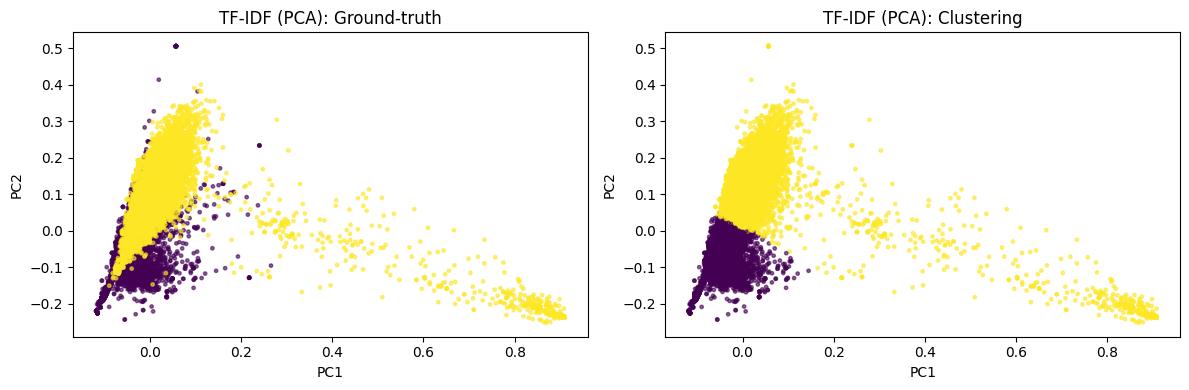

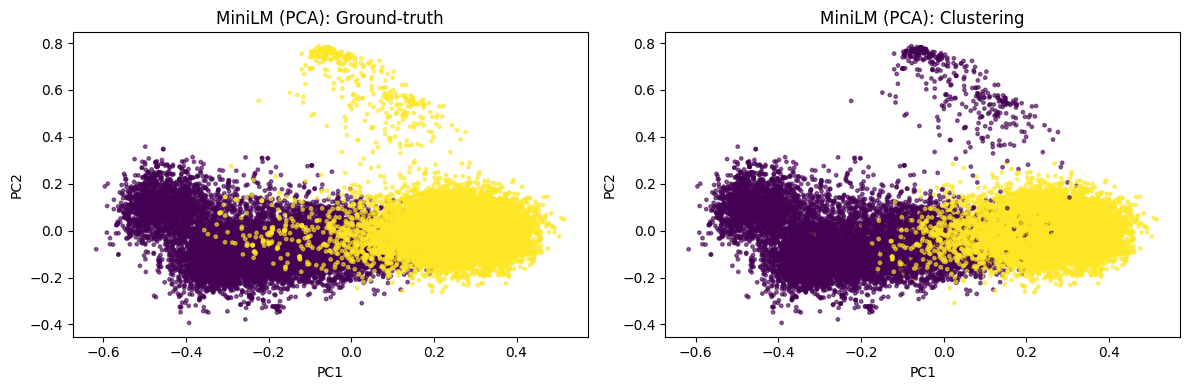

In [13]:
# Q5 visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Z_tfidf_best = Z_tfidf_none
Z_minilm_best = Z_minilm_svd

# Clustering
y_pred_tfidf = kmeans(Z_tfidf_best, n_clusters=2)
y_pred_minilm = agglo(Z_minilm_best, k=10, n_clusters=2)

# PCA for visualization
Z_tfidf_2d = PCA(n_components=2, random_state=0).fit_transform(
    Z_tfidf_best.toarray() if hasattr(Z_tfidf_best, "toarray") else Z_tfidf_best)

Z_minilm_2d = PCA(n_components=2, random_state=0).fit_transform(Z_minilm_best)

# Plot
plt.figure(figsize=(12, 4))

# ground truth
plt.subplot(1, 2, 1)
plt.scatter(Z_tfidf_2d[:, 0], Z_tfidf_2d[:, 1],
            c=y_true, s=6, alpha=0.6)
plt.title("TF-IDF (PCA): Ground-truth")
plt.xlabel("PC1")
plt.ylabel("PC2")

# clustering result
plt.subplot(1, 2, 2)
plt.scatter(Z_tfidf_2d[:, 0], Z_tfidf_2d[:, 1],
            c=y_pred_tfidf, s=6, alpha=0.6)
plt.title("TF-IDF (PCA): Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 4))

# ground truth
plt.subplot(1, 2, 1)
plt.scatter(Z_minilm_2d[:, 0], Z_minilm_2d[:, 1],
            c=y_true, s=6, alpha=0.6)
plt.title("MiniLM (PCA): Ground-truth")
plt.xlabel("PC1")
plt.ylabel("PC2")

# clustering result
plt.subplot(1, 2, 2)
plt.scatter(Z_minilm_2d[:, 0], Z_minilm_2d[:, 1], #0: PC1 as x axis, 1: PC2 as y axis
            c=y_pred_minilm, s=6, alpha=0.6)
plt.title("MiniLM (PCA): Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()



**Answer Q5:**
- From the plots, we observe that for **TF-IDF**, short and long reviews cannot be separated clearly (strongly overlapped based on the ground truth visualization), and the clustering result only capture some of the structure, leading to relatively worse clustering performance.
- On the other hand, **MiniLM** provides a clearer seperation between short and long reviews in the PCA space. The clustering assignments closely match the ground truth label, which aligns with our results in Q3. 

### Part 1 Task 2

#### Task 2.1 Construct one representation per game (positive reviews only)

In [4]:
import pandas as pd

# 1) Positive reviews only
df_pos = df[df["recommend"] == True].copy()

# 2) Build one doc per game by concatenating all positive reviews
# Use appid as the game key (unique + stable)
game_docs = (
    df_pos.groupby("appid")["review_text"]
    .apply(lambda s: " ".join(s.astype(str).tolist()))
    .reset_index(name="doc")
)

# 3) Keep metadata (game_name, genres) for later (Task 2.2 / Q7-Q8)
game_meta = (
    df_pos.groupby("appid")[["game_name", "genres"]]
    .first()
    .reset_index()
)

games = game_docs.merge(game_meta, on="appid", how="left")

print("num games:", len(games))
games.head()


num games: 200


,appid,doc,game_name,genres
0,12210,"Guys, please do yourself a favor and download ...",Grand Theft Auto IV: The Complete Edition,"Action, Adventure"
1,239140,Glad to see the misinformed reviews have been ...,Dying Light,"Action, RPG"
2,251570,One of my favorite games that I have played in...,7 Days to Die,"Action, Adventure, Indie, RPG, Simulation, Str..."
3,261550,I didn't expect to play this game in my lifeti...,Mount & Blade II: Bannerlord,"Action, Indie, RPG, Simulation, Strategy"
4,304390,---{Graphics}---☐ Masterpiece☑ Beautiful☐ Good...,FOR HONOR™,Action


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(min_df=3, stop_words="english", ngram_range=(1,1))
X_game_tfidf = tfidf_vec.fit_transform(games["doc"].values)

print("TF-IDF game matrix shape:", X_game_tfidf.shape)

TF-IDF game matrix shape: (200, 16554)


In [6]:
!pip -q install sentence-transformers

import numpy as np
from collections import defaultdict
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# Encode each positive review
texts = df_pos["review_text"].astype(str).values
appids = df_pos["appid"].values

E = model.encode(texts, batch_size=64, show_progress_bar=True, normalize_embeddings=True)

# Average embeddings per appid
sum_vec = defaultdict(lambda: np.zeros(E.shape[1], dtype=np.float32))
cnt_vec = defaultdict(int)

for a, e in zip(appids, E):
    sum_vec[a] += e.astype(np.float32)
    cnt_vec[a] += 1

# Align to the same order as `games`
X_game_minilm = np.vstack([sum_vec[a] / cnt_vec[a] for a in games["appid"].values])

print("MiniLM game embedding matrix shape:", X_game_minilm.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

MiniLM game embedding matrix shape: (200, 384)


**Answer Q6**:
Using only positive reviews, we constructed one vector per game.

- The TF-IDF game matrix has shape (200, 16,554), corresponding to 200 games and a vocabulary of 16,554 terms.

- The MiniLM game embedding matrix has shape (200, 384), corresponding to 200 games and a 384-dimensional embedding per game.

#### Task 2.2 Cluster games with default pipelines

In [7]:
from collections import Counter
import numpy as np

# Convert "Action, RPG" → ["Action", "RPG"]
def parse_genres(genres_str):
    if pd.isna(genres_str):
        return []
    return [g.strip() for g in str(genres_str).split(",") if g.strip()]

games["genre_list"] = games["genres"].apply(parse_genres)

def top_genres_for_cluster(indices, topk=3):
    counter = Counter()
    for i in indices:
        counter.update(games.loc[i, "genre_list"])
    total = len(indices)
    top = counter.most_common(topk)
    return [(g, f, f/total) for g, f in top]

def summarize_clusters(labels, pipeline_name):
    labels = np.array(labels)
    unique = sorted(set(labels))
    
    # handle noise
    clusters = [c for c in unique if c != -1]
    noise_frac = np.mean(labels == -1) if -1 in unique else 0.0
    
    rows = []
    for c in clusters:
        idxs = np.where(labels == c)[0]
        size = len(idxs)
        top3 = top_genres_for_cluster(idxs)
        
        top3_str = ", ".join([f"{g} ({p:.0%})" for g, f, p in top3])
        
        rows.append({
            "pipeline": pipeline_name,
            "cluster": c,
            "size": size,
            "top_genres": top3_str
        })
    
    return {
        "pipeline": pipeline_name,
        "num_clusters": len(clusters),
        "noise_fraction": noise_frac,
        "cluster_sizes": sorted(
            [np.sum(labels == c) for c in clusters],
            reverse=True
        ),
        "rows": rows
    }

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering

def run_kmeans(X):
    return KMeans(n_clusters=5, random_state=42, n_init="auto").fit_predict(X)

def run_agglo(X):
    if hasattr(X, "toarray"):
        X = X.toarray()
    return AgglomerativeClustering(n_clusters=5).fit_predict(X)

def run_hdbscan(X):
    !pip -q install hdbscan
    import hdbscan
    if hasattr(X, "toarray"):
        X = X.toarray()
    return hdbscan.HDBSCAN(min_cluster_size=5).fit_predict(X)

In [9]:
from sklearn.decomposition import TruncatedSVD

def dr_none(X):
    return X

def dr_svd50(X):
    return TruncatedSVD(n_components=50, random_state=42).fit_transform(X)

In [10]:
pipelines = []
summary_rows = []

representations = {
    "tfidf": X_game_tfidf,
    "minilm": X_game_minilm
}

reducers = {
    "none": dr_none,
    "svd50": dr_svd50
}

clusterers = {
    "kmeans5": run_kmeans,
    "agglo5": run_agglo,
    "hdbscan": run_hdbscan
}

for r_name, X in representations.items():
    for d_name, dr in reducers.items():
        Z = dr(X)
        
        for c_name, cl in clusterers.items():
            labels = cl(Z)
            pname = f"{r_name}_{d_name}_{c_name}"
            
            summary = summarize_clusters(labels, pname)
            pipelines.append((pname, labels, summary))
            
            summary_rows.append({
                "pipeline": pname,
                "num_clusters": summary["num_clusters"],
                "noise_fraction": summary["noise_fraction"],
                "cluster_sizes": summary["cluster_sizes"]
            })

q7_overview = pd.DataFrame(summary_rows)
q7_overview.sort_values("pipeline")

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


,pipeline,num_clusters,noise_fraction,cluster_sizes
7,minilm_none_agglo5,5,0.000,"[70, 44, 41, 34, 11]"
8,minilm_none_hdbscan,2,0.905,"[13, 6]"
6,minilm_none_kmeans5,5,0.000,"[84, 57, 40, 11, 8]"
10,minilm_svd50_agglo5,5,0.000,"[86, 62, 33, 13, 6]"
11,minilm_svd50_hdbscan,2,0.875,"[20, 5]"
9,minilm_svd50_kmeans5,5,0.000,"[79, 62, 28, 24, 7]"
1,tfidf_none_agglo5,5,0.000,"[113, 49, 29, 5, 4]"
2,tfidf_none_hdbscan,0,1.000,[]
0,tfidf_none_kmeans5,5,0.000,"[77, 62, 51, 6, 4]"
4,tfidf_svd50_agglo5,5,0.000,"[141, 38, 12, 5, 4]"


In [11]:
def show_pipeline(pipeline_name):
    for name, labels, summary in pipelines:
        if name == pipeline_name:
            return pd.DataFrame(summary["rows"]).sort_values("size", ascending=False)

show_pipeline("minilm_svd50_kmeans5")

,pipeline,cluster,size,top_genres
3,minilm_svd50_kmeans5,3,79,"Action (71%), Indie (59%), Adventure (49%)"
0,minilm_svd50_kmeans5,0,62,"Action (77%), Adventure (47%), RPG (31%)"
4,minilm_svd50_kmeans5,4,28,"Action (79%), Adventure (50%), RPG (46%)"
2,minilm_svd50_kmeans5,2,24,"Adventure (75%), Simulation (54%), Indie (50%)"
1,minilm_svd50_kmeans5,1,7,"Simulation (86%), Sports (86%), Action (14%)"


**Answer Q7**:

We evaluated clustering pipelines using TF-IDF and MiniLM game representations, with dimensionality reduction (None, SVD-50) and clustering methods (K-Means, Agglomerative, HDBSCAN).

Across all pipelines:

- K-Means and Agglomerative consistently produced 5 clusters with no noise.
- HDBSCAN performed poorly:
    - For TF-IDF: all games were labeled as noise (noise fraction = 1.0).
    - For MiniLM: only 2 clusters were found, with very high noise fractions (0.875–0.905).

The MiniLM + SVD(50) + K-Means pipeline produced balanced clusters and interpretable genre structure:

- Cluster sizes: [79, 62, 28, 24, 7]
- Top genres per cluster:
    - C3: Action (71%), Indie (59%), Adventure (49%)
    - C0: Action (77%), Adventure (47%), RPG (31%)
    - C4: Action (79%), Adventure (50%), RPG (46%)
    - C2: Adventure (75%), Simulation (54%), Indie (50%)
    - C1: Simulation (86%), Sports (86%), Action (14%)

This pipeline yields coherent genre groupings with no noise, making it the most interpretable.

#### Task 2.3 Multi-genre interpretation

In [12]:
import numpy as np

# compute purity for a given cluster
def cluster_purity(labels, cluster_id):
    idxs = np.where(labels == cluster_id)[0]
    total = len(idxs)
    
    genre_counter = Counter()
    for i in idxs:
        genre_counter.update(games.loc[i, "genre_list"])
    
    if total == 0:
        return 0.0, []
    
    top_genre, top_count = genre_counter.most_common(1)[0]
    purity = top_count / total
    
    top3 = genre_counter.most_common(3)
    top3 = [(g, f/total) for g, f in top3]
    
    return purity, top3

# find the chosen pipeline
for name, labels, summary in pipelines:
    if name == "minilm_svd50_kmeans5":
        best_labels = labels
        break

# compute purity for each cluster
clusters = sorted(set(best_labels))
purity_rows = []

for c in clusters:
    purity, top3 = cluster_purity(best_labels, c)
    purity_rows.append({
        "cluster": c,
        "purity": purity
    })

purity_df = pd.DataFrame(purity_rows).sort_values("purity", ascending=False)
purity_df

,cluster,purity
1,1,0.857143
4,4,0.785714
0,0,0.774194
2,2,0.750000
3,3,0.708861


In [14]:
def show_cluster_examples(cluster_id, n=5):
    idxs = np.where(best_labels == cluster_id)[0]
    return games.loc[idxs, ["game_name", "genres"]].head(n)

show_cluster_examples(1)
show_cluster_examples(4)

,game_name,genres
8,Mafia III: Definitive Edition,"Action, Adventure"
14,Wolcen: Lords of Mayhem,"Action, Adventure, Indie, RPG"
19,State of Decay 2: Juggernaut Edition,"Action, RPG, Simulation"
24,KARDS - The WW2 Card Game,"Casual, Free To Play, Indie, Strategy"
31,Quake Champions,"Action, Free To Play"


**Answer Q8**:

We select MiniLM + SVD(50) + K-Means (k=5) as the best pipeline because it produces balanced clusters, no noise, and clear, interpretable genre groupings.

Cluster 1
- Top genres: Simulation (86%), Sports (86%), Action (14%)
- Genre purity: 0.86
- Representative games:
    - Mafia III: Definitive Edition — Action, Adventure
    - Wolcen: Lords of Mayhem — Action, Adventure, Indie, RPG
    - State of Decay 2: Juggernaut Edition — Action, RPG, Simulation
    - KARDS – The WW2 Card Game — Casual, Free To Play, Indie, Strategy
    - Quake Champions — Action, Free To Play

Interpretation:
This cluster mainly represents simulation- and sports-oriented games, often with action elements.

Cluster 4
- Top genres: Action (79%), Adventure (50%), RPG (46%)
- Genre purity: 0.79

Interpretation:
This cluster represents action-adventure games, often with RPG mechanics and story-driven gameplay.